In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from ignition_common import *

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)    # REGIONS WITH TUMOR
sub-CON01       2100.0          none                           0.0             0              
sub-CON02       2100.0          none                           0.0             0              
sub-CON03       2100.0          none                           0.0             0              
sub-CON04       2100.0          none                           0.0             0              
sub-CON05       2400.0          none                           0.0             0              
sub-CON06       2400.0          none                           0.0             0              
sub-CON07       2400.0          none                           0.0             0              
sub-CON08       2400.0          none                           0.0             0              
sub-CON09       2400.0          none                           0.0        

Compute the Global Ignition but using the tumor masks

In [3]:
# We exclude patient 'sub-PAT10' because it has no tumor regions (ony white matter)
tumor_weighted_mignition = {
    k: np.average(
        v.mevokedinteg,
        weights=[1.0-p for p in subjects.get_subject_by_id(k).tumor_regions.get_tumor_volumes_percentage()]
    ) for k, v in tumor_subset.exclude_from_subset(['sub-PAT10']).keep_only_from_this_set(ignitions).items()
}

meningioma_weighted_mignition = {
    k: np.average(
        v.mevokedinteg,
        weights=[1.0-p for p in subjects.get_subject_by_id(k).tumor_regions.get_tumor_volumes_percentage()]
    ) for k, v in subjects.get_meningioma_subset().exclude_from_subset(['sub-PAT10']).keep_only_from_this_set(ignitions).items()
}

glioma_weighted_mignition = {
    k: np.average(
        v.mevokedinteg,
        weights=[1.0-p for p in subjects.get_subject_by_id(k).tumor_regions.get_tumor_volumes_percentage()]
    ) for k, v in subjects.get_glioma_subset().exclude_from_subset(['sub-PAT10']).keep_only_from_this_set(ignitions).items()
}

Let's plot weighted global ignition vs patients

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Tumor: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.310e-01 U_stat=1.750e+02
Control vs. Meningioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.869e-01 U_stat=8.400e+01
Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.884e-02 (ns) U_stat=9.100e+01


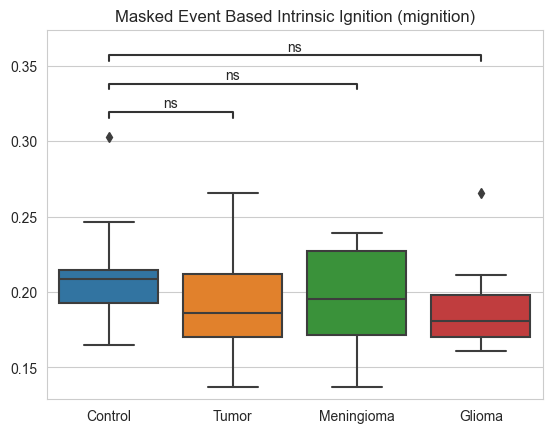

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.884e-02 U_stat=9.100e+01


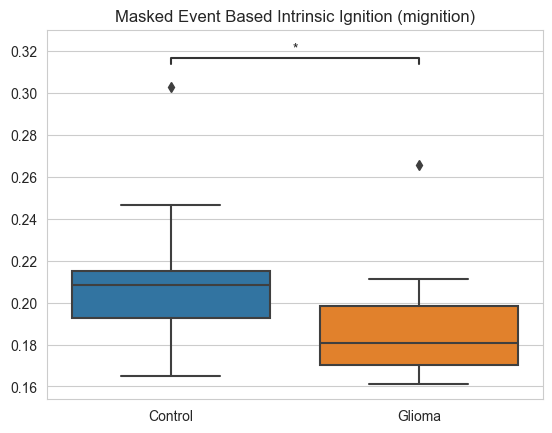

In [8]:

plotComparisonAcrossLabels2(
    {
        'Control': [v.mignition for k, v in subjects.get_control_subset().keep_only_from_this_set(ignitions).items()],
        'Tumor': [v for _, v in tumor_weighted_mignition.items()],
        'Meningioma': [v for _, v in meningioma_weighted_mignition.items()],
        'Glioma': [v for _, v in glioma_weighted_mignition.items()]
    },
    graphLabel='Masked Event Based Intrinsic Ignition (mignition)',
    pairs=[('Control', 'Tumor'), ('Control', 'Meningioma'), ('Control', 'Glioma')]
)

# Only glioma
plotComparisonAcrossLabels2(
    {
        'Control': [v.mignition for k, v in subjects.get_control_subset().keep_only_from_this_set(ignitions).items()],
        'Glioma': [v for _, v in glioma_weighted_mignition.items()]
    },
    graphLabel='Masked Event Based Intrinsic Ignition (mignition)',
)